In [8]:
from utils import transform_images, draw_outputs, load_darknet_weights
from model import YoloV3
from config import class_names
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
tf.config.run_functions_eagerly(True)


In [4]:
yolo = YoloV3(size=416, classes=80)
load_darknet_weights(yolo, r"C:\Users\khale\ML\YOLOv3 from scratch\yolov3.weights")

def predict(image_file, visualize = True, figsize = (16, 16)):
    img = tf.image.decode_image(open(image_file, 'rb').read(), channels=3)
    img = tf.expand_dims(img, 0)
    img = transform_images(img, 416)
    boxes, scores, classes, nums = yolo.predict(img, training=False)
    img = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)
    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
    if visualize:
        fig, axes = plt.subplots(figsize = figsize)
        plt.imshow(img)
        plt.show()
    return boxes, scores, classes, nums


c:\Users\khale\ML\Transfer Learning with MobileNet V2\.conda\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


c:\Users\khale\ML\Transfer Learning with MobileNet V2\.conda\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step


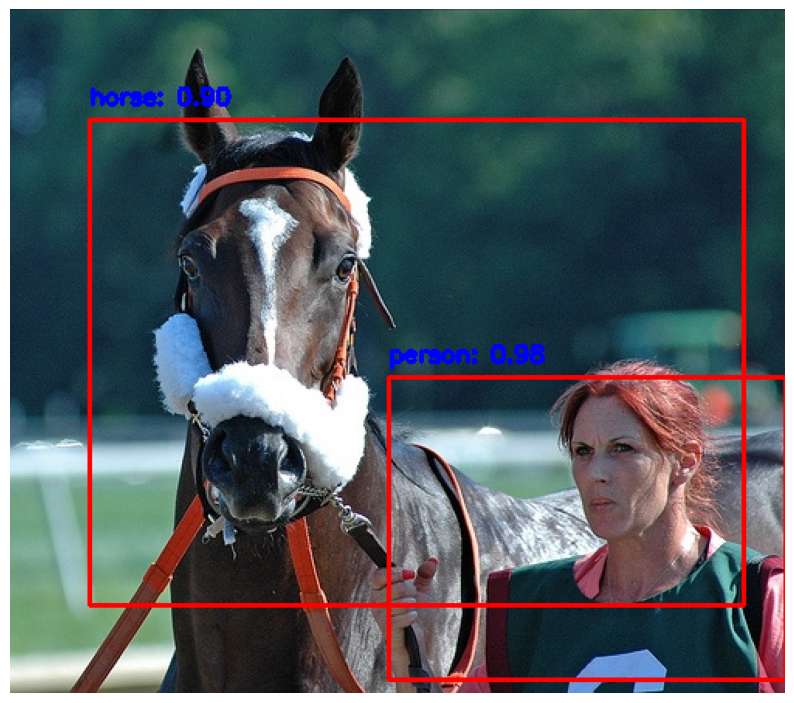

(array([[[0.53756964, 0.4895533 , 0.98082864, 1.        ],
         [0.16254172, 0.10345414, 0.8716968 , 0.9469279 ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        

In [9]:
def predict(image_file, visualize=True, figsize=(10, 12)):
    # Load and preprocess the image
    img = tf.image.decode_image(open(image_file, 'rb').read(), channels=3)
    img = tf.expand_dims(img, 0)
    img = transform_images(img, 416)
    
    # Get predictions
    boxes, scores, classes, nums = yolo.predict(img)
    
    # Convert the original image for plotting
    img = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = img.shape
    
    # Plotting the results with scaled boxes
    if visualize:
        plt.figure(figsize=figsize)
        
        for i in range(nums[0]):
            # Extract and scale box coordinates to pixel values
            y1, x1, y2, x2 = boxes[0][i]
            x1 = int(x1 * img_width)
            y1 = int(y1 * img_height)
            x2 = int(x2 * img_width)
            y2 = int(y2 * img_height)
            
            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
            # Prepare label with class and score
            class_name = class_names[int(classes[0][i])]
            score = scores[0][i]
            label = f"{class_name}: {score:.2f}"
            
            # Display label above the box
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        
        # Show the final image with annotations
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    
    return boxes, scores, classes, nums

# Define the path to the image
image_file = r"C:\Users\khale\OneDrive\Desktop\pascal dataset\images\000799.jpg"

# Run prediction and plot
predict(image_file)